In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [4]:
def PolynomialRegression(degrees=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degrees),
                    LinearRegression(**kwargs))

In [5]:
def make_data(N, err=1.0, rseed=1):
  rng = np.random.RandomState(rseed)
  X   = rng.rand(N,1)**2
  y   = 10 - 1/(X.ravel() + 0.1)

  if err>0.0:
    y += err * rng.randn(N)

  return X,y

X,y = make_data(40)

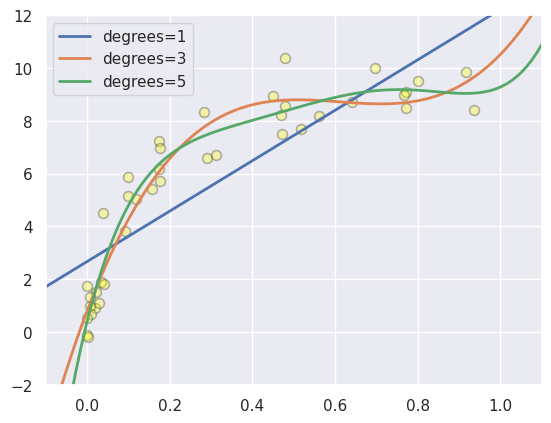

In [6]:
Xtest = np.linspace(-0.1, 1.1, 100)[:,np.newaxis]

plt.scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2, alpha=0.3)

for deg in np.array([1,3,5]):
  ypred = PolynomialRegression(deg).fit(X,y).predict(Xtest)
  plt.plot(Xtest.ravel(), ypred, linestyle='-', lw=2.0, label=f'degrees={deg}')

plt.xlim(-0.1, 1.1)
plt.ylim(-2, 12)
plt.legend(loc='best')

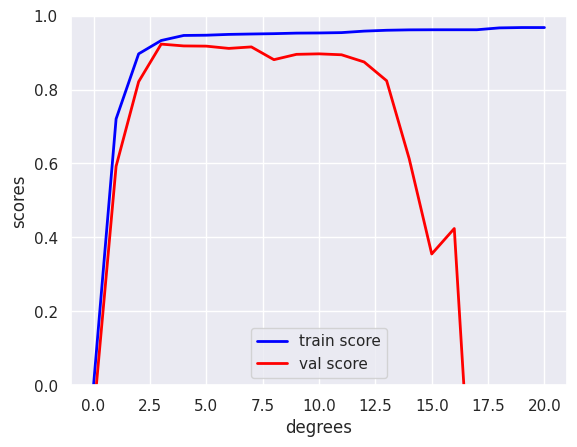

In [7]:
from sklearn.model_selection import validation_curve

degrees = np.arange(0,21)

train_score, val_score  = validation_curve(PolynomialRegression(), X, y,
                                           param_name='polynomialfeatures__degree',
                                           param_range=degrees, cv=7)
plt.plot(degrees, np.median(train_score, 1), color='blue', lw=2.0, label='train score')
plt.plot(degrees, np.median(val_score  , 1), color='red' , lw=2.0, label='val score')
plt.ylim(0,1)
plt.xlabel('degrees')
plt.ylabel('scores')
plt.legend(loc='best')

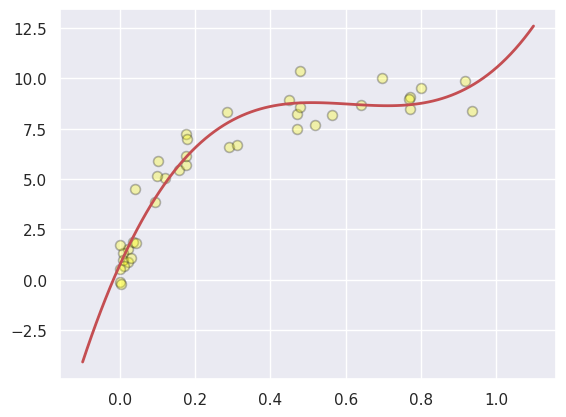

In [8]:
ypred = PolynomialRegression(3).fit(X,y).predict(Xtest)
plt.scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2, alpha=0.3)
plt.plot(Xtest.ravel(), ypred, '-r', lw=2.0)

In [9]:
X2,y2 = make_data(300)

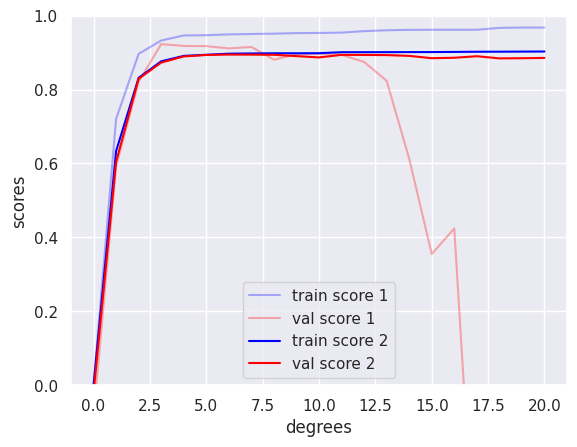

In [10]:
train_score1, val_score1  = validation_curve(PolynomialRegression(), X, y,
                                             param_name='polynomialfeatures__degree',
                                             param_range=degrees, cv=7)
train_score2, val_score2  = validation_curve(PolynomialRegression(), X2, y2,
                                             param_name='polynomialfeatures__degree',
                                             param_range=degrees, cv=7)
plt.plot(degrees, np.median(train_score1, 1), color='blue', alpha=0.3, label='train score 1')
plt.plot(degrees, np.median(val_score1  , 1), color='red' , alpha=0.3, label='val score 1')
plt.plot(degrees, np.median(train_score2, 1), color='blue', label='train score 2')
plt.plot(degrees, np.median(val_score2  , 1), color='red' , label='val score 2')
plt.ylim(0,1)
plt.xlabel('degrees')
plt.ylabel('scores')
plt.legend(loc='best')



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 25 instead of 50.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 25 instead of 50.
  warnings.warn(


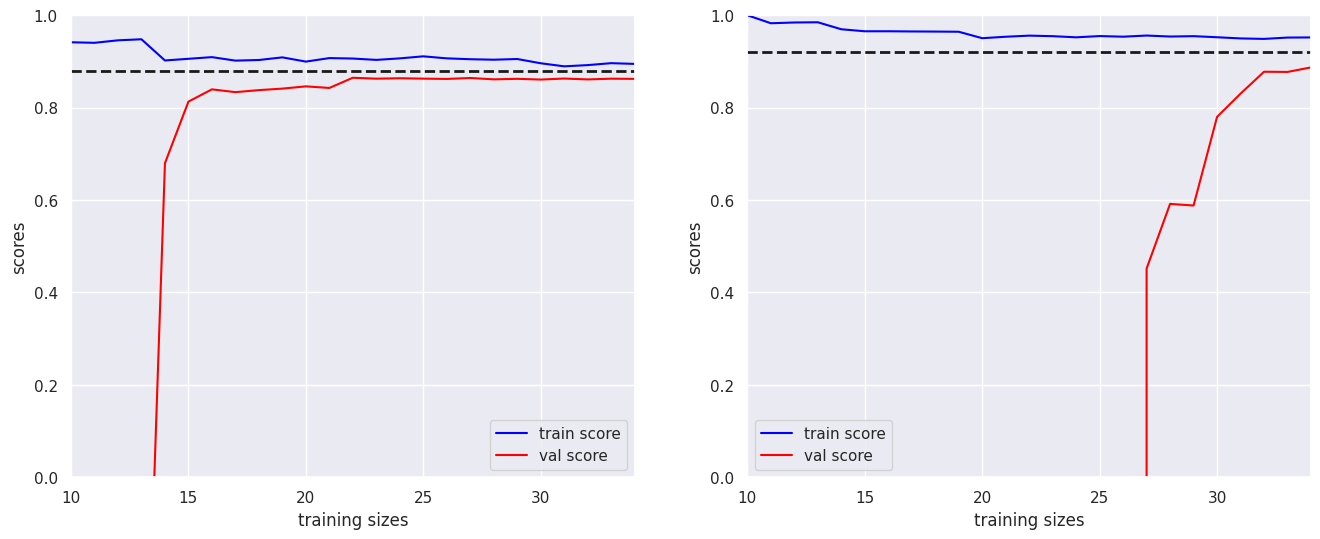

In [11]:
from sklearn.model_selection import learning_curve

fig,ax  = plt.subplots(1,2, figsize=(16,6))

for i,deg in enumerate([2,9]):
  N, train_score, val_score = learning_curve(PolynomialRegression(deg), X, y,
                                             train_sizes=np.linspace(0.3,1.0,50), cv=7)
  ax[i].plot(N, np.mean(train_score, 1), color='blue', label='train score')
  ax[i].plot(N, np.mean(val_score  , 1), color='red' , label='val score')

  # ax[i].axhline(np.mean([train_score[-1], val_score[-1]]),
  #               linestyle='--', color='k', lw=2.0)
  ax[i].hlines([
      np.mean([train_score[-1], val_score[-1]])
  ], N[0], N[-1], linestyle='--', color='k', lw=2.0)

  ax[i].set_xlim(N[0], N[-1])
  ax[i].set_ylim(0,1)
  ax[i].set_xlabel('training sizes')
  ax[i].set_ylabel('scores')
  ax[i].legend(loc='best')

In [12]:
from sklearn.model_selection import GridSearchCV

grid_params={
    'polynomialfeatures__degree':np.arange(0,21),
    'linearregression__fit_intercept':[True, False],
    'linearregression__positive':[True, False]
}

grid  = GridSearchCV(PolynomialRegression(), grid_params, cv=7)
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__positive': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [13]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__positive': False,
 'polynomialfeatures__degree': 4}

In [14]:
model = grid.best_estimator_
model.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [15]:
ypred = model.predict(Xtest)

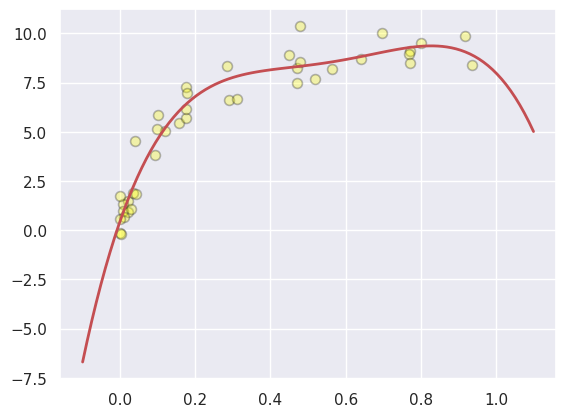

In [16]:
plt.scatter(X.ravel(), y, s=50, ec='k', fc='yellow', lw=1.2, alpha=0.3)
plt.plot(Xtest.ravel(), ypred, '-r', lw=2.0)